# Credit Analysis
This code tries to solve the problem of lending risk using data science and AI. We perform credit analysis using various methods to determine the probability of an applicant to pay back a loan on time and predict whether they will default on the loan. Data is provided by Kaggle (https://www.kaggle.com/datasets/wordsforthewise/lending-club).

In [1]:
# Import Libraries
import pandas as pd

import random
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read csv file
loan = pd.read_csv('accepted_2007_to_2018Q4.csv.')


C:\Users\Lucas\.conda\envs\dev\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Preview data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# View data information to determine number of features and different data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [5]:
loan.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
# Perform deeper analysis of the different data types
dtypes = loan.dtypes
print(dtypes)

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object


In [7]:
loan.dtypes.value_counts()

float64    113
object      38
dtype: int64

In [8]:
# Check for missing data 
loan.isnull().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [9]:
# View percantage of missing data
missing_data = pd.DataFrame({'total_missing': loan.isnull().sum(), '%_missing': 
(loan.isnull().sum()/2260701)*100})
missing_data.head(20)

,total_missing,%_missing
id,0,0.000000
member_id,2260701,100.000000
loan_amnt,33,0.001460
funded_amnt,33,0.001460
funded_amnt_inv,33,0.001460
term,33,0.001460
int_rate,33,0.001460
installment,33,0.001460
grade,33,0.001460
sub_grade,33,0.001460


In [10]:
# Create new dataframe with limited features - we will use these features to make predictions on the 'loan_stauts' feature (which predicts whether the loan is paid back or charged off).
loans_df = loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 
                'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
                'loan_status', 'pymnt_plan', 'mths_since_recent_inq', 'bc_util']]
loans_df.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,mths_since_recent_inq,bc_util
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,4.0,37.2
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,0.0,27.1
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,n,10.0,55.9
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Current,n,NaN,12.1
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,n,1.0,77.5
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Fully Paid,n,NaN,91.0
6,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,Not Verified,Fully Paid,n,10.0,102.9
7,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.0,Not Verified,Fully Paid,n,8.0,5.7
8,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,SERVICE MANAGER,6 years,RENT,85000.0,Not Verified,Fully Paid,n,1.0,50.1
9,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,Vendor liaison,10+ years,MORTGAGE,42000.0,Not Verified,Fully Paid,n,10.0,41.4


In [11]:
loans_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,mths_since_recent_inq,bc_util
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,1.965233e+06,2.184597e+06
mean,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,7.024194e+00,5.789995e+01
std,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,5.965411e+00,2.858347e+01
min,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,2.000000e+00,3.540000e+01
50%,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,5.000000e+00,6.020000e+01
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,1.100000e+01,8.310000e+01
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,2.500000e+01,3.396000e+02


In [12]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
loans_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,mths_since_recent_inq,bc_util
count,2260668,2260668,2260668,2260668,2260668,2260664,1965233,2184597
mean,15047,15042,15023,13,446,77992,7,58
std,9190,9188,9192,5,267,112696,6,29
min,500,500,0,5,5,0,0,0
25%,8000,8000,8000,9,252,46000,2,35
50%,12900,12875,12800,13,378,65000,5,60
75%,20000,20000,20000,16,593,93000,11,83
max,40000,40000,40000,31,1720,110000000,25,340


In [13]:
# Check null values in new dataframe
loans_df.isnull().sum()

loan_amnt                    33
funded_amnt                  33
funded_amnt_inv              33
term                         33
int_rate                     33
installment                  33
grade                        33
sub_grade                    33
emp_title                167002
emp_length               146940
home_ownership               33
annual_inc                   37
verification_status          33
loan_status                  33
pymnt_plan                   33
mths_since_recent_inq    295468
bc_util                   76104
dtype: int64

In [14]:
# Due to such a large amount of data, we have decided to drop rows with null data
loans_df = loans_df.dropna()
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1804201 entries, 0 to 2260698
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   loan_amnt              float64
 1   funded_amnt            float64
 2   funded_amnt_inv        float64
 3   term                   object 
 4   int_rate               float64
 5   installment            float64
 6   grade                  object 
 7   sub_grade              object 
 8   emp_title              object 
 9   emp_length             object 
 10  home_ownership         object 
 11  annual_inc             float64
 12  verification_status    object 
 13  loan_status            object 
 14  pymnt_plan             object 
 15  mths_since_recent_inq  float64
 16  bc_util                float64
dtypes: float64(8), object(9)
memory usage: 247.8+ MB


# Univariate Analysis
In this section, we take a look at each feature to assess whether there are any outliers or skewness in the data that we need to take care of before training our model.

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>],
       [<AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'mths_since_recent_inq'}>,
        <AxesSubplot:title={'center':'bc_util'}>, <AxesSubplot:>]],
      dtype=object)

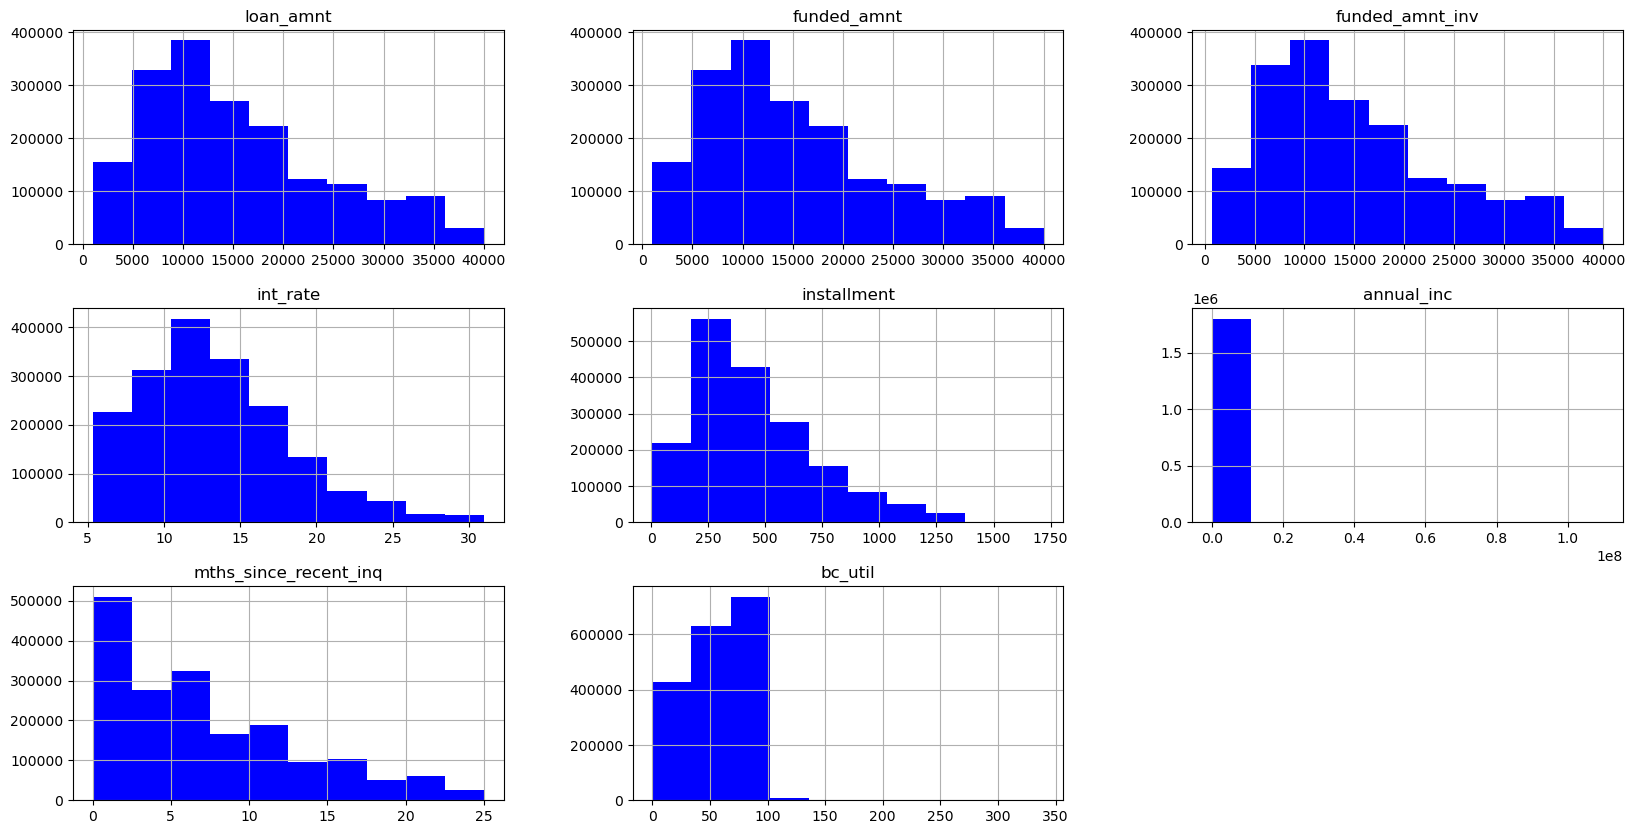

In [15]:
# Plot histograms to look for outliers, which we can see there are in annual_inc and bc_util
loans_df.hist(bins = 10, figsize = (20,10), color = 'b')

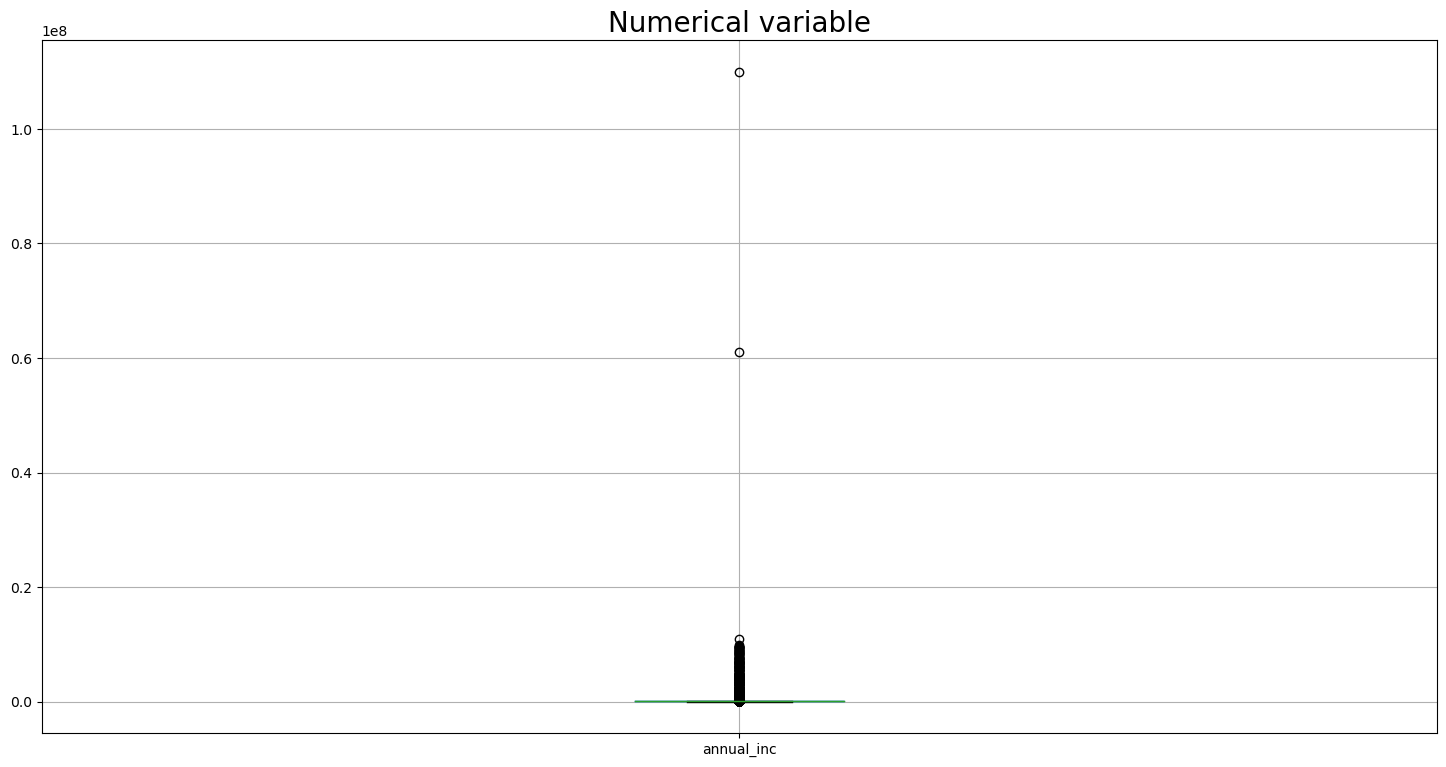

In [16]:
# Create a boxplot to get a closer look at the data and observe outliers
num_cols = ['annual_inc']
plt.figure(figsize=(18,9))
loans_df[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

In [17]:
# Limit data using quantiles to remove outliers
q_low = loans_df["annual_inc"].quantile(0.08)
q_hi  = loans_df["annual_inc"].quantile(0.92)

loans_df = loans_df[(loans_df["annual_inc"] < q_hi) & (loans_df["annual_inc"] > q_low)]

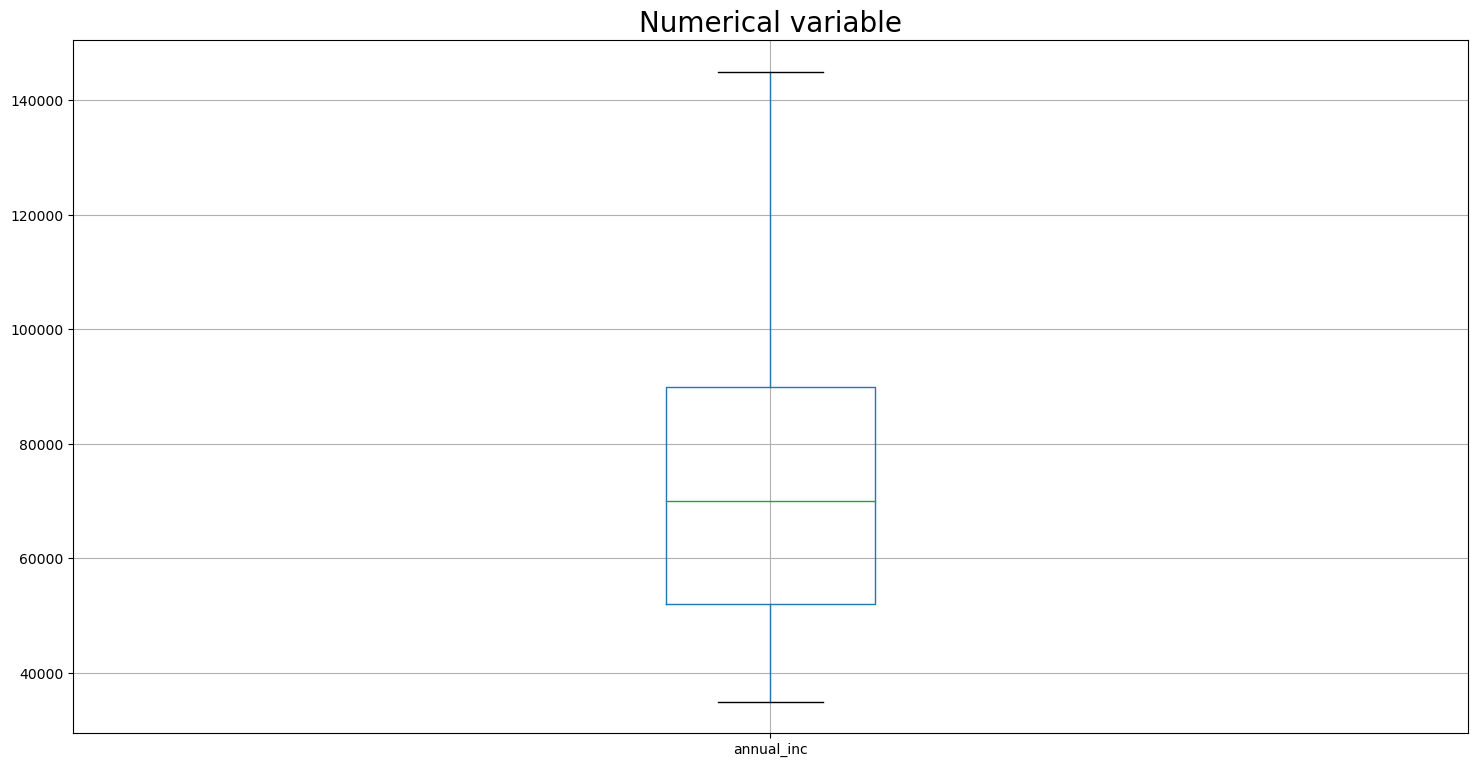

In [18]:
# Take a look at updated data using boxplot
num_cols = ['annual_inc']
plt.figure(figsize=(18,9))
loans_df[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

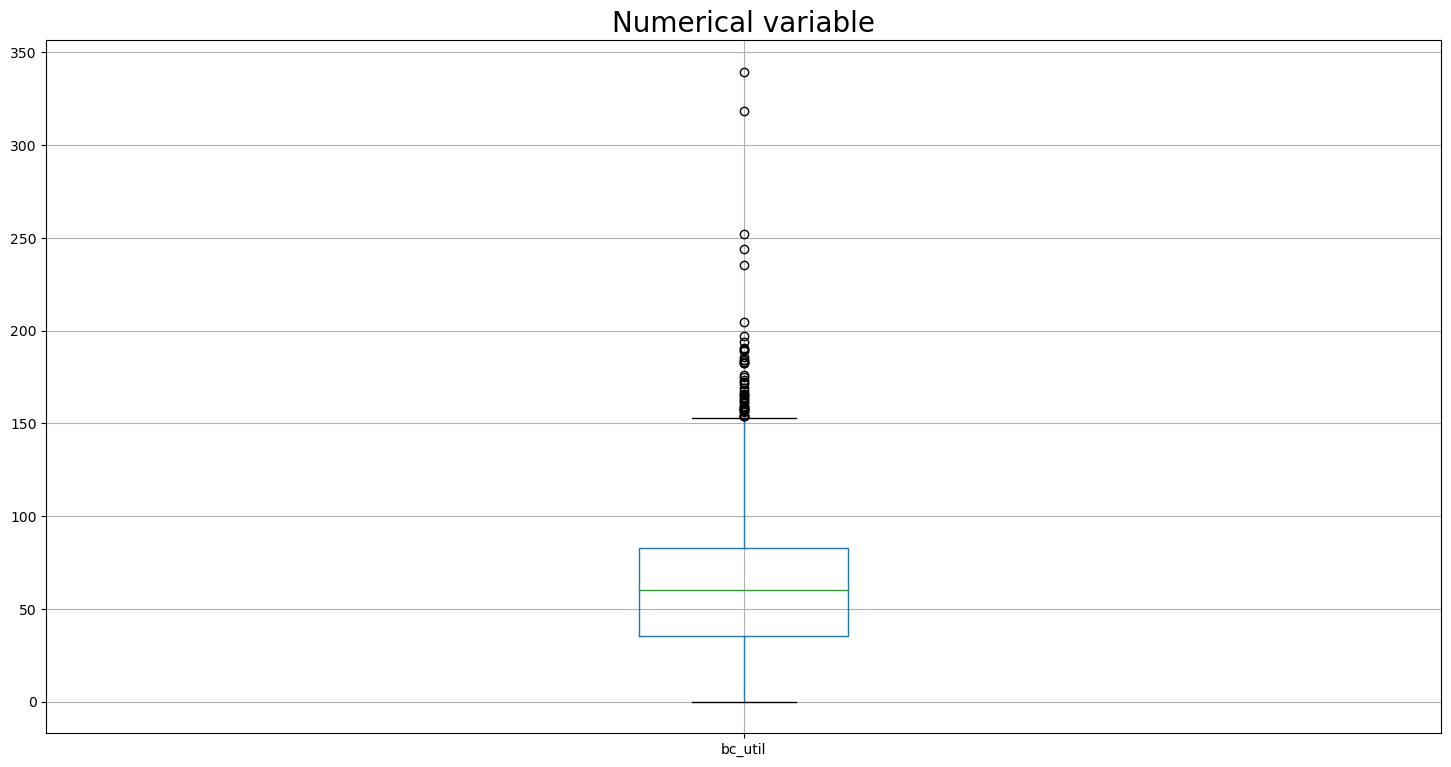

In [19]:
# Create boxplot of bc_util feature to observe outliers
num_cols = ['bc_util']
plt.figure(figsize=(18,9))
loans_df[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

In [20]:
# Calculate mean of bc_util feature and replace any value above 160 with mean value
mean_bc = loans_df['bc_util'].mean()
loans_df.loc[loans_df['bc_util'] > 160, 'bc_util'] = mean_bc

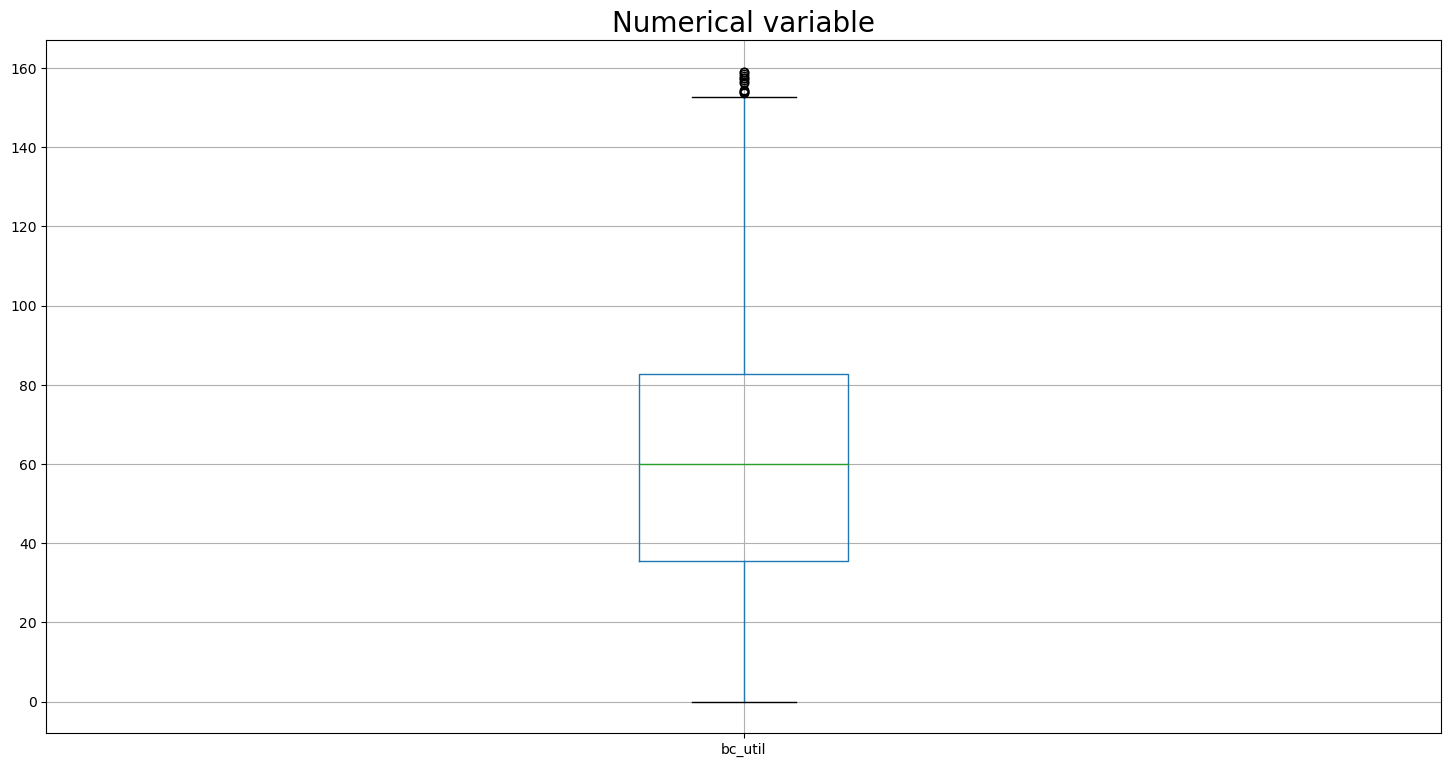

In [21]:
# Take another look at boxplot to see if outliers removed
num_cols = ['bc_util']
plt.figure(figsize=(18,9))
loans_df[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>],
       [<AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'annual_inc'}>],
       [<AxesSubplot:title={'center':'mths_since_recent_inq'}>,
        <AxesSubplot:title={'center':'bc_util'}>, <AxesSubplot:>]],
      dtype=object)

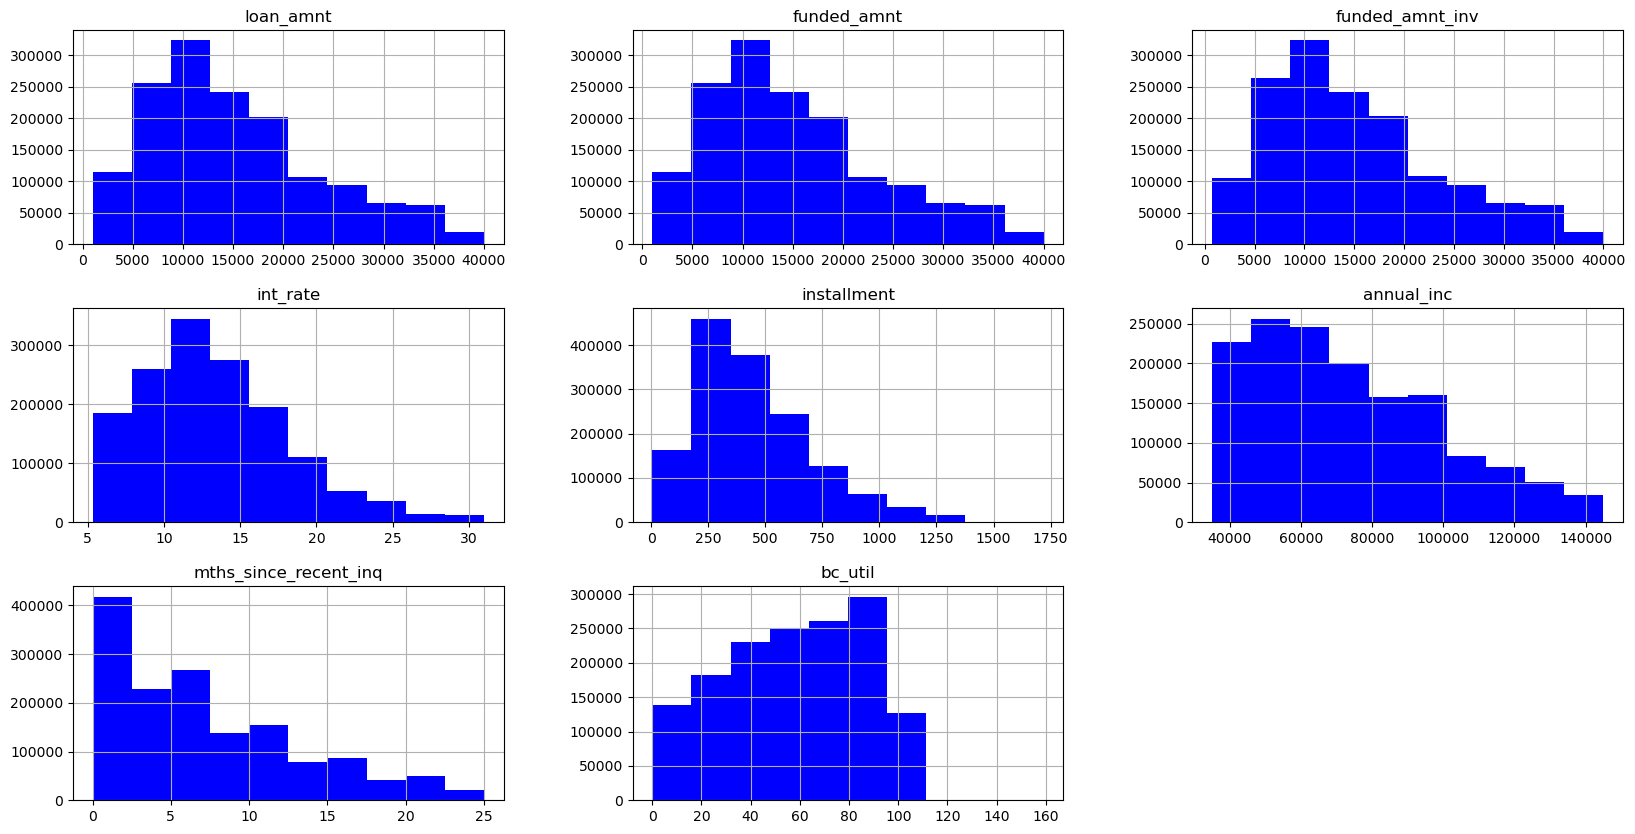

In [22]:
# Look at histograms again
loans_df.hist(bins = 10, figsize = (20,10), color = 'b')

In [23]:
# Set pandas to display float data with 2 decimal points
pd.set_option('display.float_format', '{:.2f}'.format)

# Calculate the skewness of all columns
skewness = loans_df.skew()

# Print the skewness report
print(skewness)

loan_amnt                0.72
funded_amnt              0.72
funded_amnt_inv          0.73
int_rate                 0.77
installment              0.97
annual_inc               0.66
mths_since_recent_inq    0.89
bc_util                 -0.27
dtype: float64


C:\Users\Lucas\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


### The skewness report shows that the features were only moderately skewed after removing outliers, so we did not do any further modifications to the data. 

# Categorical Features
Here we look at adjusting our categorical features, and we use two methods: Ordinal encoding and one-hot encoding.
Ordinal encoding converts the labels into numeric form and was used on features that consisted of ordinal data (meaning a clear ordering of categories) and there is an order, for example education level. We used one-hot encoding for non-ordinal categories. 

In [24]:
# Create new labels for ordinal data 
ordinal_transformation = {'term': {' 36 months': 1.0, ' 60 months': 2.0},
                          'grade': {"A": 1.0, "B": 2.0, "C": 3.0, "D": 4.0, "E": 5.0,
                                  "F": 11.0, "G": 12.0},
                          'sub_grade': {"A1": 1.0, "A2": 2.0, "A3": 3.0, "A4": 4.0, "A5": 5.0,
                                  "B1": 11.0, "B2": 12.0, "B3": 13.0, "B4": 14.0, "B5": 15.0,
                                  "C1": 21.0, "C2": 22.0, "C3": 23.0, "C4": 24.0, "C5": 25.0,
                                  "D1": 31.0, "D2": 32.0, "D3": 33.0, "D4": 34.0, "D5": 35.0,
                                  "E1": 41.0, "E2": 42.0, "E3": 43.0, "E4": 44.0, "E5": 45.0,
                                  "F1": 51.0, "F2": 52.0, "F3": 53.0, "F4": 54.0, "F5": 55.0,
                                  "G1": 61.0, "G2": 62.0, "G3": 63.0, "G4": 64.0, "G5": 65.0,
                                    },
                          "emp_length": {"< 1 year": 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0, 
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0 }    
}

# Replace data
loans_df = loans_df.replace(ordinal_transformation)

# Preview data
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485538 entries, 0 to 2260698
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   loan_amnt              1485538 non-null  float64
 1   funded_amnt            1485538 non-null  float64
 2   funded_amnt_inv        1485538 non-null  float64
 3   term                   1485538 non-null  float64
 4   int_rate               1485538 non-null  float64
 5   installment            1485538 non-null  float64
 6   grade                  1485538 non-null  float64
 7   sub_grade              1485538 non-null  float64
 8   emp_title              1485538 non-null  object 
 9   emp_length             1485538 non-null  float64
 10  home_ownership         1485538 non-null  object 
 11  annual_inc             1485538 non-null  float64
 12  verification_status    1485538 non-null  object 
 13  loan_status            1485538 non-null  object 
 14  pymnt_plan        

In [25]:
# Change object features to category
loans_df = loans_df.astype({"home_ownership":'category', "verification_status":'category', "pymnt_plan":'category',})
loans_df.dtypes

loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                      float64
int_rate                  float64
installment               float64
grade                     float64
sub_grade                 float64
emp_title                  object
emp_length                float64
home_ownership           category
annual_inc                float64
verification_status      category
loan_status                object
pymnt_plan               category
mths_since_recent_inq     float64
bc_util                   float64
dtype: object

In [26]:
# Create variable for category data
cat_columns = ["home_ownership", "verification_status", "pymnt_plan"]

# Create a new DataFrame for our processed data and get dummmy values
loans_df = pd.get_dummies(loans_df, columns=cat_columns)
loans_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y
0,3600.00,3600.00,3600.00,1.00,13.99,123.03,3.00,24.00,leadman,10.00,...,1,0,0,0,0,1,0,0,1,0
1,24700.00,24700.00,24700.00,1.00,11.99,820.28,3.00,21.00,Engineer,10.00,...,1,0,0,0,0,1,0,0,1,0
2,20000.00,20000.00,20000.00,2.00,10.78,432.66,2.00,14.00,truck driver,10.00,...,1,0,0,0,0,1,0,0,1,0
4,10400.00,10400.00,10400.00,2.00,22.45,289.91,11.00,51.00,Contract Specialist,3.00,...,1,0,0,0,0,0,1,0,1,0
7,20000.00,20000.00,20000.00,1.00,8.49,631.26,2.00,11.00,road driver,10.00,...,1,0,0,0,0,1,0,0,1,0


In [27]:
# Limit options of loan_status to 2 variables, charged off or fully paid
array = ['Charged Off', 'Fully Paid']
loans_df = loans_df.loc[loans_df['loan_status'].isin(array)]
loans_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y
0,3600.00,3600.00,3600.00,1.00,13.99,123.03,3.00,24.00,leadman,10.00,...,1,0,0,0,0,1,0,0,1,0
1,24700.00,24700.00,24700.00,1.00,11.99,820.28,3.00,21.00,Engineer,10.00,...,1,0,0,0,0,1,0,0,1,0
2,20000.00,20000.00,20000.00,2.00,10.78,432.66,2.00,14.00,truck driver,10.00,...,1,0,0,0,0,1,0,0,1,0
4,10400.00,10400.00,10400.00,2.00,22.45,289.91,11.00,51.00,Contract Specialist,3.00,...,1,0,0,0,0,0,1,0,1,0
7,20000.00,20000.00,20000.00,1.00,8.49,631.26,2.00,11.00,road driver,10.00,...,1,0,0,0,0,1,0,0,1,0


In [28]:
# Use ordinal transformation to assign values
transformation_2 = {"loan_status": { "Fully Paid": 1.0, "Charged Off": 0.0}}
loans_df = loans_df.replace(transformation_2)

# Look at datatypes 
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900517 entries, 0 to 2260697
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            900517 non-null  float64
 1   funded_amnt                          900517 non-null  float64
 2   funded_amnt_inv                      900517 non-null  float64
 3   term                                 900517 non-null  float64
 4   int_rate                             900517 non-null  float64
 5   installment                          900517 non-null  float64
 6   grade                                900517 non-null  float64
 7   sub_grade                            900517 non-null  float64
 8   emp_title                            900517 non-null  object 
 9   emp_length                           900517 non-null  float64
 10  annual_inc                           900517 non-null  float64
 11  loan_status 

In [29]:
# Drop remaining object feature
loans_df.drop(["emp_title"], axis = 1, inplace = True)

# Build and Train Machine Learning Models
### Establish logistic regression model as baseline

In [30]:
# Set X and y variables for machine learning model
X = loans_df.drop('loan_status', axis=1)
y = loans_df['loan_status']

# Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [31]:
# Import Logistic Regression model libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Set the model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# Perform predictions of model on test data
y_pred = model.predict(X_test)

# Print accuracy report
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [33]:
# Import standard scaler 
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# use the scaled data for modeling
from sklearn.linear_model import LogisticRegression

model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)


LogisticRegression()

In [34]:
# transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# make predictions on the scaled test data
y_pred = model_scaled.predict(X_test_scaled)

# Print accuracy report
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_scaled.score(X_test_scaled, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [37]:
# Import pickle library to save machine learning model
import pickle as pkl

In [38]:
# Set filename and save model
filename = 'logistic_regression_model.sav'
pkl.dump(model_scaled, open(filename, 'wb'))

In [39]:
loans_df.to_csv('loans_df.csv', index=False)

### Establish a random forest machine model

In [40]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import accuracy_score, classification_report

In [41]:
# instantiate random forest classifier model instance
rf= RandomForestClassifier(random_state=1)

# Fit the model to the data using the training data
model_rf = rf.fit(X_train_scaled, y_train)

# Use the testing data to make the model predictions
y_pred_rf = model_rf.predict(X_test_scaled)

# Review the model's predicted values
y_pred_rf[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
# Print accuracy report
print('Accuracy of random forest model on test set: {:.2f}'.format(model_rf.score(X_test_scaled, y_test)))

Accuracy of random forest model on test set: 0.79


In [43]:
#filename = 'random_forest_model.sav'
#pkl.dump(model_rf, open(filename, 'wb'))